# Assignment 2
- Nama : Umniya Zahra
- Program : Python for Data Science
- Kode Peserta : PYTN-KS015-004

# Import Library
    Library yg digunakan seperti pandas, numpy, matplotlib utk grafik, seaborn, scipy.stats untuk menghitung mean,median dsb

In [282]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})

import math

import statistics
import scipy.stats as stats
from scipy.stats import  norm, pearsonr

import statsmodels.api as sm

import random
import warnings

plt.style.use('ggplot')

    Setelah itu kita mulai berkenalan dengan datanya dengan membaca data

In [283]:
df = pd.read_csv('nyc-rolling-sales.csv')
print(df)

       Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0               4        1  ALPHABET CITY   
1               5        1  ALPHABET CITY   
2               6        1  ALPHABET CITY   
3               7        1  ALPHABET CITY   
4               8        1  ALPHABET CITY   
...           ...      ...            ...   
84543        8409        5        WOODROW   
84544        8410        5        WOODROW   
84545        8411        5        WOODROW   
84546        8412        5        WOODROW   
84547        8413        5        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
1      07 RENTALS - WALKUP APARTMENTS                                 2   
2      07 RENTALS - WALKUP APARTMENTS                                 2   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
...      

In [284]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

    Lalu kita menggunakan syntax untuk melihat bentuk data nya berapa kali berapa dan juga apa saja variabel yang terdapat pada data tersebut

In [286]:
df.shape

(84548, 22)

In [287]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [288]:
df.isnull().any()

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

Dapat dilihat jika tidak ada data yg bernilai 0

# PREPROCESSING DATA
    Setelah itu kita mulai membersihkan data, bagiam=n mana saja yang kiranya tidak bisa digunakan untuk dibuang, jika ada yang tidak sesuai dengan kriteria maka diganti

In [289]:
df_clean = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1) #

df_clean.info()

sum(df_clean.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

2751

In [290]:
df_clean = df_clean.drop_duplicates()

    Disini kita mengganti data yang bertuliskan - menjadi 0, agar nantinya data tersebut bisa diolah

In [291]:
df_clean.replace(' -  ', 0,  inplace=True)
df_clean

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [292]:
YearBuilt = df_clean['YEAR BUILT'].astype('int64')
YearBuilt.info()

<class 'pandas.core.series.Series'>
Int64Index: 81797 entries, 0 to 84547
Series name: YEAR BUILT
Non-Null Count  Dtype
--------------  -----
81797 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


In [293]:
SalePrice = df_clean['TOTAL UNITS'].astype('int64')
SalePrice.info()

<class 'pandas.core.series.Series'>
Int64Index: 81797 entries, 0 to 84547
Series name: TOTAL UNITS
Non-Null Count  Dtype
--------------  -----
81797 non-null  int64
dtypes: int64(1)
memory usage: 1.2 MB


    Karena saya ingin mengolah data dari daerah Alphabet City saja, maka saya mengambil data dari Alphabet City dan yang lain tidak saya gunakan

In [294]:
AlphabetCity = df_clean[df_clean['NEIGHBORHOOD'] == 'ALPHABET CITY']
AlphabetCity

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1,ALPHABET CITY,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,,394,,0,0,0,0,0,0,4,RA,0,2017-08-09 00:00:00
199,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,384,RK,0,0,1,0,0,2005,4,RK,10800000,2017-03-10 00:00:00
200,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,397,RK,0,0,1,0,0,1989,4,RK,52625000,2016-10-19 00:00:00
201,1,ALPHABET CITY,46 CONDO STORE BUILDINGS,4,397,RK,0,0,1,0,0,1989,4,RK,0,2016-10-19 00:00:00


    Mengambil variabel Year Built dan Total Units untuk diolah

In [295]:
AlphabetCity[['YEAR BUILT', 'TOTAL UNITS']].head()

,YEAR BUILT,TOTAL UNITS
0,1900,5
1,1900,31
2,1900,17
3,1913,10
4,1900,6


In [296]:
TotalUnits = np.array(AlphabetCity['TOTAL UNITS'])
print(TotalUnits)

[  5  31  17  10   6  20   8  46  15  24  34  10   0   0   0   0   0   0
   0   0   0   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  47   0 132   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   4   5   6   6   1   1   1   1   1   1   1   1   1   1   1   1
   1   0   0   0   0   0   0   1   1   1   0   1   1   1   1]


In [297]:
YearBuilt = np.array(AlphabetCity['YEAR BUILT'])
print(YearBuilt)

[1900 1900 1900 1913 1900 1900 1920 1900 1920 1920 1910 2009 1920 1920
 1920 1920 1920 1925 1920 1920 1900 1902 1928 1928 1928 1928 1910 1920
 1900 1930 1930 1900 1910 1920 1920 1935 1910 1910 1910 1910 1900 1900
 1937 1937 1937 1937 1920 1920 1920 1920 1920 1915 1915 1950 1950 1937
 1937 1900 1900 1900 1929 1900 1929 1920 1928 1900 1925 1910 1901 1920
 1940 1900 2005    0 1989    0    0    0 1920 1920 1920 1920 1920 1920
    0 2014 2014 2014 2014 2014 2014 2005    0    0 1928 1928 2005 1910
 1910 1910 1910 1910 1910 2008    0    0    0 2014 2014 2014 2014 2014
 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014
 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 2014
 1965 1965 1965 1965 2013 2013 1910 1900 1910 1910 2003 2003 2003 2003
 2005    0    0 2006 2006    0 2007 1900 1951 1900 1900 1900 1900 1920
 1920 1899 1900 1900    0 2005 1989 1989 2014]


# Measure of Central Tendency
    Menghitung Mean, Median, Modus dari Year Built dan Total Units

- Mean

In [298]:
mean = np.mean(YearBuilt)
mean


1797.0225988700565

In [299]:
mean = np.mean(TotalUnits)
mean

3.056497175141243

- Median

In [300]:
median = np.median(YearBuilt)
median

1920.0

In [301]:
median = np.median(TotalUnits)
median

1.0

- Modus

In [302]:
mode = stats.mode(YearBuilt)
mode

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_97656\507851502.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(YearBuilt)


ModeResult(mode=array([2014], dtype=int64), count=array([40]))

In [303]:
mode = stats.mode(TotalUnits)
mode

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_97656\1005667208.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(TotalUnits)


ModeResult(mode=array([1], dtype=int64), count=array([91]))

# Measure of Spread
    Menghitung Standar Deviasi, Varias , dan Range dari Total Units dan Year Built

Standar Deviasi

In [304]:
standard_deviance = np.std(YearBuilt, ddof=1)
standard_deviance

530.0433296482196

In [305]:
standard_deviance = np.std(TotalUnits, ddof=1)
standard_deviance

11.872292760363353

Varians

In [306]:
variance = np.var(YearBuilt, ddof=1)
variance

280945.93130457116

In [307]:
variance = np.var(TotalUnits, ddof=1)
variance

140.95133538777608

Range

In [308]:
range = np.ptp(YearBuilt)
range

2014

In [309]:
range = np.ptp(TotalUnits)
range

132

# Probability Distribution
    Menghitung probability distribution dari data , distribusi yang saya gunakan adalah distribusi normal

Normal Distribution

In [310]:
data_normal = norm.rvs(size = 177, loc=0, scale=1)
data_normal

array([-0.50152538,  1.00773818, -0.2392137 ,  0.23785153,  0.67484535,
        0.57479703, -0.39853947,  1.16894676, -0.17746348, -0.20582447,
       -0.11210657, -0.60938485, -0.15771036, -0.07315384, -0.39628807,
       -1.85665278,  0.11259034, -1.12721819,  0.13569131, -1.54441701,
       -0.6819229 ,  0.47911837, -0.65793366,  1.15568654,  1.03585308,
       -1.54693382, -0.04044419, -0.78645195,  1.10832912, -0.42143661,
        1.13989032,  0.50028588,  0.19797532, -1.41216775,  0.42422186,
       -1.99764024,  2.08068922,  0.8243186 ,  0.70068665, -1.14341686,
       -0.07874348,  0.27411699,  1.13730371,  0.50056236,  0.12220951,
       -0.18241471, -0.58739083, -0.32222075,  0.47474771, -0.95613692,
        0.12127714,  1.1770668 ,  0.99145085, -1.22766664, -0.61912255,
       -0.64842212,  0.05416299,  0.4434584 , -1.86163169,  0.36469918,
       -0.45351883, -1.2934521 , -1.51796588,  1.10157719, -0.07461831,
        0.87849107, -0.34186395, -1.76148549, -0.20085987, -1.69

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

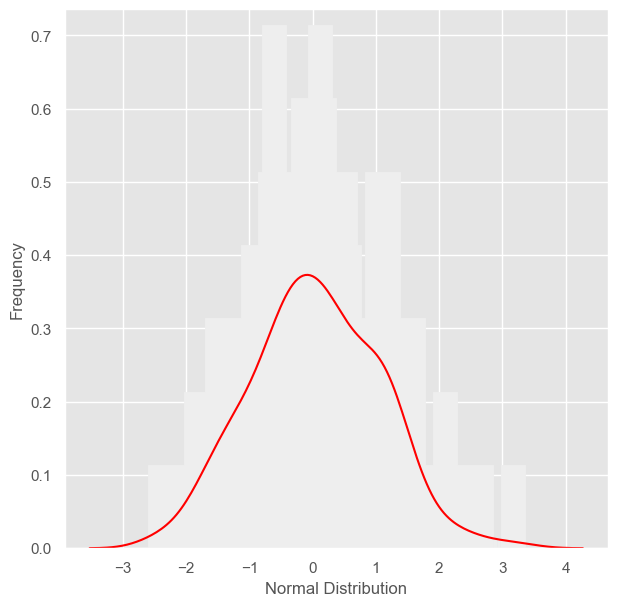

In [311]:
ax = sns.distplot(data_normal,
                  bins = 100,
                  kde = True,
                  color = 'red',
                  hist_kws = {"linewidth": 15, 'alpha':1}
)
ax.set(xlabel='Normal Distribution', ylabel = 'Frequency')

# Confidence Interval
    Menghitung confidence interval dari data Year Built dan Total Units

In [312]:
mean_yb = AlphabetCity['YEAR BUILT'].mean()
n_yb = AlphabetCity['YEAR BUILT'].count()
sd_yb = statistics.stdev(AlphabetCity['YEAR BUILT'])
z = 1.96 #95%
sd_yb

530.0433296482195

In [313]:
lcb = mean_yb - z * (sd_ci/np.sqrt(n_yb))
ucb = mean_yb + z * (sd_ci/np.sqrt(n_yb))
print(lcb,ucb)

1718.9352260437588 1875.1099716963543


Sehingga nilai CI dari Year Built adalah [1718.9352260437588 ,  1875.1099716963543]

In [314]:
mean_tu = AlphabetCity['TOTAL UNITS'].mean()
n_tu = AlphabetCity['TOTAL UNITS'].count()
sd_tu = statistics.stdev(AlphabetCity['TOTAL UNITS'])
z = 1.96 #95%
sd_tu

11.872292760363353

In [315]:
lcb = mean_tu - z * (sd_ci/np.sqrt(n_tu))
ucb = mean_tu + z * (sd_ci/np.sqrt(n_tu))
print(lcb,ucb)

-75.03087565115649 81.14387000143898


Sehingga nilai CI dari Total Units adalah [-75.03087565115649  ,  81.14387000143898]

# Hypothesis Testing
    Menarik kesimpulan dengan hypothesis testing menggunakan Pearson's Correlation Test 
    dengan asumsi bahwa kedua sample independen.
    Ho = sampel independen
    Ha = sampel terdapat dependen
    dengan p value 0.05

In [316]:
# Pearson's Correlation Test

stat, p = pearsonr(YearBuilt, TotalUnits)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Independent')
else :
    print('Probably Dependent')


stat=0.054, p=0.476
Probably Independent


Dapat dilihat jika nilai stat 0.054 yang artinya > 0.05. Maka dapat diambil kesimpulan jika kedua sampel independen

# KESIMPULAN

Dari daerah Alphabet City yang diatas dapat dilihat jika kedua variabel independen yaitu Year Built dan Total Units dengan nilai CI terletak antara [1718.9352260437588 ,  1875.1099716963543] dan [-75.03087565115649  ,  81.14387000143898]. Dengan tanah rata-rata dibangun pada 2014 dan total unit keseluruhan 177.